# **Introdução**

Este trabalho foi desenvolvido no âmbito da unidade curricular de Inteligência artificial, com o objetivo de resolver um problema de planeamento de tarefas utilizando algoritmos de inteligência artificial.
O projeto foi realizado em equipa pelo grupo L01, composto pelos seguintes elementos:

*   Fábio Miranda    (26003)
*   Daniela Pereira    (26988)
*   Gonçalo Costa    (26024)

Para implementar a solução, optámos por utilizar a ferramenta Google Colab, devido à sua versatilidade e integração com bibliotecas de pesquisa de soluções.

O objetivo geral é desenvolver uma solução capaz de programar todas as tarefas de um projeto, minimizando atrasos e otimizando a alocação de recursos, garantindo a execução eficiente no menor tempo possível.

### **Formulação do objetivo**
O objetivo do trabalho é encontrar uma solução ótima para o planeamento de tarefas, considerando restrições e diferentes formas de execução. Os principais objetivos englobam:

Minimizar atrasos no projeto.
Utilizar eficientemente os recursos disponíveis.
Obter a solução com a pontuação mais elevada dentro de um período de tempo pré-determinado.

### **Limitações**
As restrições consideradas no projeto são exclusivamente restrições fortes, ou seja, condições que precisam ser obrigatoriamente cumpridas para que a solução seja válida.
Apenas uma implementação por vez pode ser avaliada, o que pode limitar a exploração de múltiplas soluções em paralelo.


#1. **Analise do ficheiro**

Este código tem como objetivo processar um ficheiro de texto que contém informações sobre um conjunto de tarefas, nomeadamente as  durações,relações de precedência entre as tarefas, os recursos necessários para cada tarefa com a quantidade disponível de cada recurso.

Ele organiza estas informações em estruturas de dados como dicionários e listas para facilitar o acesso dos dados.

O processo de leitura do ficheiro é feito linha por linha, identificando diferentes seções do ficheiro com base em palavras-chave que indicam o início de cada seção, como "#Precedence relations", "#Duration and resources" e "#Resource availability".

Conforme o código lê cada linha, ele altera a sua ação para processar corretamente as informações da secção correspondente.

</br>

---

##1.   **Relações de precedência:**
O código extrai e armazena, para cada tarefa, informações sobre os trabalhos que devem ser realizados antes dela (sucessores), organizando-as num dicionário.

</br>

---

##2.   **Durações e recursos:**
Para cada tarefa, o código guarda a sua duração e os recursos necessários para completá-la. Ele também associa cada recurso ao seu respectivo custo para a tarefa.

</br>

---

##3. **Disponibilidade de recursos:**
O código também armazena a quantidade disponível de cada recurso, o que permite uma análise de alocação posterior.


---

</br>

Além disso, o código também processa uma secção para recursos auxiliares, que fornece informações sobre tipos de recursos, suas quantidades e nomes.


No final, a função retorna a duração total do projeto (horizon) e os dados organizados sobre as relações de precedência, as durações dos trabalhos, os recursos necessários e a disponibilidade dos recursos.

In [ ]:
def process_file(filename):
    precedence_relations = {}
    requests_durations = {}
    aux_resources = {"resources": []}  # Inicializando a lista de recursos
    resource_availabilities = {}
    current_section = None

    with open(filename, 'r') as file:
        for line in file:
            line = line.strip()

            # Identificando as seções e mudando o contexto
            if line.startswith("#Precedence relations"):
                current_section = "precedence_relations"
                next(file)
                continue
            elif line.startswith("#Duration and resources"):
                current_section = "requests_durations"
                continue
            elif line.startswith("#Resource availability"):
                current_section = "resource_availabilities"
                next(file)
                continue
            elif line.startswith("************************************************************************"):
                current_section = None
                continue
            elif line.startswith("horizon"):
                horizon = int(line.split()[len(line.split())-1])
                next(file)
                continue
            elif line.startswith("RESOURCES"):
                continue  # Ignorar a linha "RESOURCES"
            elif line.startswith("#Projects summary"):
                continue  # Ignorar a linha "#Projects summary"

            # Processamento da seção de relações de precedência
            if current_section == "precedence_relations":
                parts = line.split()
                if len(parts) >= 4:
                    jobnr = parts[0]
                    modes = int(parts[1])
                    successors_count = int(parts[2])
                    successors = parts[3:]
                    precedence_relations[jobnr] = {
                        "#modes": modes,
                        "#successors": successors_count,
                        "successors": successors
                    }

            # Processamento da seção de durações e recursos
            elif current_section == "requests_durations":
                parts = line.split()

                # Recolhe o nome dos recursos dos trabalhos
                if line.startswith("#jobnr.") and len(parts) > 3:
                    aux_resources["resources"] = parts[3:]
                    continue

                # Agora processa os trabalhos, associando recursos a cada trabalho
                if len(parts) >= 4:
                    jobnr = parts[0]
                    mode = parts[1]
                    duration = int(parts[2])
                    resources = parts[3:]  # Listagem dos custos dos recursos para este trabalho
                    requests_durations[jobnr] = {
                        "mode": mode,
                        "duration": duration,
                        "resources": {}
                    }

                    # Associa cada recurso ao custo correspondente
                    for r, cost in zip(aux_resources["resources"], resources):
                        requests_durations[jobnr]["resources"][r] = int(cost)

            # Processamento da seção de disponibilidade de recursos
            elif current_section == "resource_availabilities":
                parts = line.split()
                if len(parts) == 2 and parts[0].startswith("R"):  # Considerando que os recursos começam com "R"
                    resource_name = parts[0]
                    resource_qty = int(parts[1])
                    resource_availabilities[resource_name] = resource_qty

            # Processamento dos recursos auxiliares (quando estão listados sob RESOURCES)
            elif line.startswith("  -"):
                parts = line.split(":")
                resource_type = parts[0].strip()  # Tipo de recurso (renewable, nonrenewable, etc.)
                resource_qty = int(parts[1].split()[0])  # Quantidade de recursos
                resource_name = parts[1].split()[1]  # Nome do recurso (R, N, D, etc.)
                aux_resources["resources"].append(resource_name)

    return horizon, precedence_relations, requests_durations, resource_availabilities



## 1.2 **Publicação de um ficheiro**
Aqui o utilizador poderá publicar um ficheiro para que possa ser lido.


In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
   print('User uploaded file "{name}" with length {length} bytes'.format(
       name=fn, length=len(uploaded[fn])))


Saving p01_dataset_10.txt to p01_dataset_10.txt
User uploaded file "p01_dataset_10.txt" with length 1822 bytes


## 1.3 **Leitura do ficheiro**
Depois de publicar, é chamado a função anterior e mostrado na saída da célula a estrutura de dados.

In [ ]:
nomeFicheiro = fn #ou coloque o nome de um dos ficheiros publicado
horizon, precedence_relations, requests_durations, resource_availabilities = process_file(nomeFicheiro)

print("Horizon:")
print(horizon)

print("\nPrecedence Relations:")
print(precedence_relations)

print("\nRequests/Durations:")
print(requests_durations)

print("\nResource Availabilities:")
print(resource_availabilities)


Horizon:
46

Precedence Relations:
{'1': {'#modes': 1, '#successors': 3, 'successors': ['2', '3', '4']}, '2': {'#modes': 3, '#successors': 2, 'successors': ['5', '6']}, '3': {'#modes': 3, '#successors': 2, 'successors': ['10', '11']}, '4': {'#modes': 3, '#successors': 1, 'successors': ['9']}, '5': {'#modes': 3, '#successors': 2, 'successors': ['7', '8']}, '6': {'#modes': 3, '#successors': 2, 'successors': ['10', '11']}, '7': {'#modes': 3, '#successors': 2, 'successors': ['9', '10']}, '8': {'#modes': 3, '#successors': 1, 'successors': ['9']}, '9': {'#modes': 3, '#successors': 1, 'successors': ['12']}, '10': {'#modes': 3, '#successors': 1, 'successors': ['12']}, '11': {'#modes': 3, '#successors': 1, 'successors': ['12']}}

Requests/Durations:
{'1': {'mode': '1', 'duration': 0, 'resources': {'R1': 0, 'R2': 0}}, '2': {'mode': '1', 'duration': 3, 'resources': {'R1': 6, 'R2': 2}}, '3': {'mode': '1', 'duration': 1, 'resources': {'R1': 0, 'R2': 0}}, '4': {'mode': '1', 'duration': 8, 'resources

# 2. **Solução desenvolvida**

## 2.1 **Importar biblioteca necessária**


Com a execução do comando abaixo, o objetivo é procurar e instalar a versão mais recente da biblioteca "python-constraint"

In [ ]:
pip install python-constraint

  Preparing metadata (setup.py) ... done
  Created wheel for python-constraint: filename=python_constraint-1.4.0-py2.py3-none-any.whl size=24059 sha256=a27f295a46552d0a2db6f9169a17520395f85dd4ceba7e5006b687d4dd6e7494
  Stored in directory: /root/.cache/pip/wheels/2e/f2/2b/cb08b5fe129e4f69b7033061f256e5c551b0aa1160c2872aee
Successfully built python-constraint


## 2.2 **Criação das variaveis e domínios**


### 2.2.1 **Inicialização**
Aqui é inicializado a instância do problema e também é guardado o id dos trabalhos para que possam ser usadas como variáveis

In [ ]:
from constraint import Problem, FunctionConstraint

csp_problem = Problem()

task_ids = list(requests_durations.keys())


### 2.2.2 **Cálculo da maior duração dos sucessores**
Nesta seção, é realizada a leitura dos sucessores de cada trabalho, identificando a maior duração entre eles. Este valor é armazenado para determinar utilziar no cálculo do último dia possível de início dos trabalhos. Dessa forma, garante-se que, se um trabalho tiver sucessores, ele não seja iniciado num dia em que o tempo restante até o final seja insuficiente para a sua execução.

Assim dividido em duas funções:

**calculate_max_successor_duration:** esta função é responsável por calcular a maior duração de sucessores para todos os trabalhos.

**calculate_max_successor:** esta função trata de calcular a maior duração específica de cada trabalho com base nos seus sucessores.


In [ ]:
# Função para calcular a maior duração dos sucessores da tarefa
def calculate_max_successor(sucessors):
    max_sucessor = 0
    for task in sucessors:
        duration = requests_durations[task]["duration"]
        if duration > max_sucessor:
            max_sucessor = duration
    return max_sucessor
# Função para calcular a maior duração dos sucessores de todas as tarefas
def calculate_max_successor_duration(task_ids):
    max_sucessor_durations = {}
    for task in task_ids:
        if task in precedence_relations.keys():
            max_sucessor = calculate_max_successor(precedence_relations[task]["successors"])
            if max_sucessor > 0:
                max_sucessor_durations[task] = max_sucessor
    return max_sucessor_durations

max_sucessor_durations = calculate_max_successor_duration(task_ids)

### 2.2.3 **Cálculo da maior duração dos predecessores**
Neste passo, é calculada a maior duração dos predecessores. Isso é importante porque, caso a tarefa tenha predecessores, ela não poderá iniciar antes de um dia que não permita a conclusão da tarefa anterior. Podendo assim, calcular o dia de inicio mínimo.

Temos assim as seguintes funções:

**find_predecessors**: Serve para encontrar os predecessores de uma função, verificando se pertence à chave *'successors'* de cada tarefa guardada.

**calculate_max_predecessor_duration**: Calcula a maior duração dos predecessores, de todas as tarefas

In [ ]:
def find_predecessors(task_id):
    predecessors = []
    for predecessor, details in precedence_relations.items():
        if task_id in details['successors']:
            predecessors.append(predecessor)
    return predecessors

def calculate_max_predecessor_duration(task_ids):
    max_durations = {}
    for task_id in task_ids:
        predecessors = find_predecessors(task_id)
        if predecessors:
            max_duration = max(requests_durations[predecessor]['duration'] for predecessor in predecessors)
            if max_duration > 0:
                max_durations[task_id] = max_duration
    return max_durations

max_predecessor_durations = calculate_max_predecessor_duration(task_ids)

### 2.2.4 **Cálculo dos domínios**
Com a função **calculate_domain** é calculado o domínio de cada taréfa, no qual, o inicio é o primeiro dia mais o maior predecessor e o final é o horizon menos a duração do trabalho e o maior sucessor.

In [ ]:
def calculate_domain(task_id):
    start = -1
    end = horizon - requests_durations[task_id]["duration"]
    if requests_durations[task_id]["duration"] == 0 and task_id in precedence_relations.keys():
        domain = [0]
        return domain
    if task_id in max_predecessor_durations:
        start += max_predecessor_durations[task_id]
    if task_id in max_sucessor_durations:
        end -= max_sucessor_durations[task_id]
    domain = list(range(end, start, -1))
    return domain


domains = {}

for task_id in task_ids:
    domains[task_id] = calculate_domain(task_id)

### 2.2.5 **Definição das tarefas e seus domínios**
Primeiramente é organizado as tarefas com o intuíto de utilizar a heuristica minimum-remaining-values (MRV) que consiste escolher a variável com numeros menor de valores "legais".

Após disso, é definido as variáveis e seus respetivos domínios

In [ ]:
# heuristica MRV
task_ids = sorted(task_ids, key=lambda task_id: len(domains[task_id]))

for task_id in task_ids:  # ordered_task_ids
    print(f"{task_id} -> {domains[task_id]}")
    csp_problem.addVariable(task_id, domains[task_id])

1 -> [0]
7 -> [33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4]
6 -> [35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3]
4 -> [33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
5 -> [36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3]
8 -> [37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4]
9 -> [41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8]
10 -> [39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6]
3 -> [38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 

#2.3 **Definição de restrições**

## 2.3.1 **Restrição dos sucessores**
Esta função adiciona a restrição que, para cada trabalho nos 'successors' terão de iniciar depois deste acabar.

In [ ]:
# Adicionando as restrições de precedência
for pred, pred_data in precedence_relations.items():
    # Verificar se a duração do predecessor não é 0
    if requests_durations[pred]["duration"] > 0:
        # Para cada tarefa predecessora 'pred', que tem sucessores
      for succ in pred_data['successors']:
            csp_problem.addConstraint(
                lambda start_pred, start_succ, pred=pred, succ=succ: start_succ > start_pred + requests_durations[pred]["duration"] - 1,
                [pred, succ]
            )
    else:
       csp_problem.addConstraint(lambda x: x == 0, [pred])
       for succ in pred_data['successors']:
            csp_problem.addConstraint(
                lambda start_pred, start_succ, pred=pred, succ=succ: start_succ > start_pred,
                [pred, succ]
            )

## 2.3.2 **Restrição do zero**
Esta restrição permite verificar se existe alguma tarefa que inicie no dia 0, se não tiver, a tentativa é rejeitada.


In [ ]:
# Função para garantir que ao menos uma tarefa comece no tempo 0
def anyStartZero(*args):
    if 0 in args:
        return True
    else:
        return False

csp_problem.addConstraint(FunctionConstraint(anyStartZero), task_ids)

## 2.3.3 **Restrição do trabalho final**
Presente no dataset, temos uma tarefa que tem duração 0 e não tem sucessores, ou seja, corresponde ao marco final do projeto. Esta restrição faz com que todos os outros trabalhos não ocorram depois do final.

In [ ]:
for task in task_ids:
    if requests_durations[task]["duration"] == 0 and task not in precedence_relations.keys():
        for other_task in task_ids:
            if task != other_task:
              if requests_durations[other_task]["duration"] != 0 and other_task not in precedence_relations.keys():
                  csp_problem.addConstraint(
                      lambda start_task, start_zero_task, task=other_task: start_task + requests_durations[task]["duration"] - 1 < start_zero_task,
                      [other_task, task]
                  )


## 2.3.4 **Restrição dos recursos**

Esta restrição verifica, para cada momento no tempo, quais tarefas estão ativas e calcula o uso total de cada recurso. Em seguida, compara esse uso com a capacidade dos recursos disponíveis. Se o uso de algum recurso ultrapassar sua capacidade em qualquer ponto no tempo, a função retorna ***False***. Caso contrário, retorna True, indicando que os recursos foram utilizados de forma adequada.

In [ ]:
def resources_check(*args):
    # Criamos um dicionário que mapeia a tarefa para seu tempo de início
    active_tasks = {task_id: args[i] for i, task_id in enumerate(task_ids)}
    # Para cada momento no tempo (de 0 até o horizonte ou data limite)
    for time in range(horizon):
        #inicialização do uso de recursos
        resource_usage = {f'R{r+1}': 0 for r in range(len(resource_availabilities))}

        # Para cada tarefa, verificamos se ela está ativa no tempo atual
        for task_id, start_time in active_tasks.items():
            task_duration = requests_durations[task_id]["duration"]

            # Se a tarefa estiver ativa no tempo 'time'
            if start_time <= time < start_time + task_duration:
                # Para cada recurso da tarefa, adicionamos ao uso do recurso
                for r in range(len(resource_availabilities)):
                    resource_key = f'R{r+1}'
                    task_req = requests_durations[task_id]["resources"].get(resource_key, 0)
                    resource_usage[resource_key] += task_req

        # Verificamos se algum recurso está sendo utilizado além da sua capacidade
        if any(resource_usage[r] > resource_availabilities[r] for r in resource_usage):
            return False

    # Se a verificação passar para todos os tempos, retorna True
    return True

csp_problem.addConstraint(FunctionConstraint(resources_check), task_ids)

#2.4 **Execução do problema**

Após a formulação do problema, é executada a sua solução. Se a solução for encontrada, são apresentadas as datas de início e fim de cada tarefa. Além disso é pedido ao utilizador quantas soluções a mais quer que o codigo avalia, isto para ver se consegue encontrar uma solução melhor.

In [ ]:
def showSolution(task,start_time):
          duration = requests_durations[task]["duration"]
          if duration == 0:
              print(f"Tarefa {task}: Início em {start_time} | Fim em {start_time}")
          else:
              end_time = start_time + duration - 1
              print(f"Tarefa {task}: Início em {start_time} | Fim em {end_time}")

def sumStartTimes():
  sum = 0
  for task, start_time in solution.items():
    sum += start_time
  return sum

solutions = []
max_attempts = int(input("Escolhe o numero maximo de soluções a encontrar: "))
attempts = 0
solution = 1


best_solution = csp_problem.getSolution()
print(best_solution)
if best_solution:
    print("Solução encontrada:")
    for task, start_time in sorted(best_solution.items(), key=lambda x: x[1]):
      showSolution(task,start_time)
    solutions.append(best_solution)
    print("=-="*20)
    while solution and attempts < max_attempts:
      solution = csp_problem.getSolution()
      attempts += 1
      if solution not in solutions:
          if sumStartTimes(best_solution) < sumStartTimes():
              best_solution = solution
              solutions.append(solution)
              print("=-="*20)
              print("Nova solução encontrada:")
              for task, start_time in sorted(solution.items(), key=lambda x: x[1]):
                showSolution(task,start_time)
              print("=-="*20)
else:
    print("Nenhuma solução encontrada.")


Escolhe o numero maximo de soluções a encontrar: 0
{'10': 14, '9': 16, '1': 0, '7': 8, '5': 4, '2': 1, '6': 8, '3': 13, '12': 21, '11': 16, '8': 12, '4': 4}
Solução encontrada:
Tarefa 1: Início em 0 | Fim em 0
Tarefa 2: Início em 1 | Fim em 3
Tarefa 5: Início em 4 | Fim em 7
Tarefa 4: Início em 4 | Fim em 11
Tarefa 7: Início em 8 | Fim em 13
Tarefa 6: Início em 8 | Fim em 11
Tarefa 8: Início em 12 | Fim em 15
Tarefa 3: Início em 13 | Fim em 13
Tarefa 10: Início em 14 | Fim em 20
Tarefa 9: Início em 16 | Fim em 20
Tarefa 11: Início em 16 | Fim em 19
Tarefa 12: Início em 21 | Fim em 21
=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=


#**Apresentar Gráficamente**

O seguinte código apresentado cria um gráfico de barras horizontais para visualizar um cronograma de tarefas, usando as bibliotecas Matplotlib e NumPy. A função **"visualizar_cronograma_plot"** recebe dois parâmetros:

***solucao***: Um dicionário onde as chaves são identificadores de tarefas e os valores são os tempos de início dessas tarefas

***duracoes***: Outro dicionário onde as chaves são as tarefas e os valores indicam a duração dessas tarefas.

O código começa com a criação de três listas vazias: **"tarefas"**, **"inicios"** e **"duracoes_list"**, que serão preenchidas com os dados extraídos de ***solucao*** e ***duracoes***.

Após isso, o código percorre o dicionário ***solucao***, ordenando as suas chaves e preenchendo as listas com os nomes das tarefas, os tempos de início e as durações correspondentes.

Após a preparação dos dados, o gráfico é criado com a chamada de **"plt.subplots()"**, que gera uma figura e um eixo onde o gráfico será desenhado. As barras horizontais são desenhadas com a função **"ax.barh()"**, onde ***y_pos*** define a posição vertical das barras, ***duracoes_list*** determina o comprimento de cada barra e inicios define o ponto de início de cada barra.  

Concluindo, o gráfico é exibido usando **"plt.show()"**. Quando a função é chamada com os parâmetros ***solution*** e ***requests_durations***, ela gera e exibe o cronograma das tarefas, mostrando quando cada tarefa começa e sua duração em um gráfico de barras horizontais

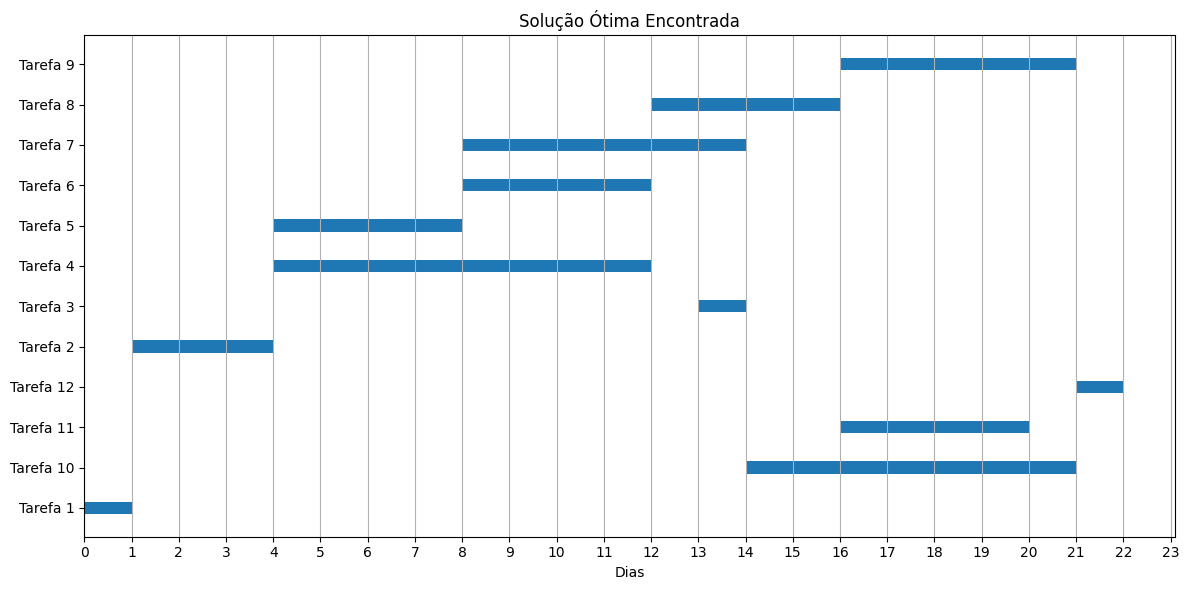

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def visualizar_cronograma_plot(solucao, duracoes):

    # Preparar dados
    tarefas = []
    inicios = []
    duracoes_list = []

    for tarefa, inicio in sorted(solucao.items()):
        tarefas.append(f"Tarefa {tarefa}")
        inicios.append(int(inicio))
        duracao = duracoes[tarefa]["duration"]

        # Se a duração for 0, definimos a duração como 1 (para exibir apenas o início)
        duracoes_list.append(duracao if duracao != 0 else 1)

    # Criar figura
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plotar barras
    y_pos = np.arange(len(tarefas))
    ax.barh(y_pos, duracoes_list, left=inicios, height=0.3)

    # Personalizar gráfico
    ax.set_yticks(y_pos)
    ax.set_yticklabels(tarefas)
    ax.set_xlabel('Dias')
    ax.set_title('Solução Ótima Encontrada')

    # Adicionar grid vertical
    ax.grid(axis='x')

    # Ajustar o intervalo das divisões no eixo X
    ax.xaxis.set_major_locator(plt.MultipleLocator(1))  # Subdivisão em 1 (pode mudar para 0.5, 0.1, etc.)

    # Ajustar layout
    plt.tight_layout()
    plt.show()

# Exemplo de chamada
visualizar_cronograma_plot(best_solution, requests_durations)


#**Conclusão**

O desenvolvimento deste projeto foi uma experiência enriquecedora que permitiu explorar técnicas de inteligência artificial aplicadas ao planeamento de tarefas, com foco na minimização de atrasos e na otimização de recursos. A utilização do Google Colab desempenhou um papel essencial, viabilizando o trabalho colaborativo e a execução de algoritmos exigentes em termos computacionais.

Os objetivos definidos foram alcançados com sucesso, resultando no desenvolvimento de um algoritmo capaz de gerar múltiplas soluções e identificar a solução ótima para cada cenário. Os resultados obtidos foram satisfatórios, evidenciando a eficácia das abordagens adotadas. No entanto, identificámos a necessidade de melhorias futuras, especialmente em termos de eficiência e capacidade de generalização do agente para problemas mais complexos.

Este projeto também foi uma oportunidade para aplicar os conhecimentos adquiridos nas aulas, expandir competências de desenvolvimento e enfrentar novos desafios. O trabalho em equipa foi fundamental para o progresso e para o sucesso da iniciativa, destacando-se como um dos pilares centrais do projeto.

Em suma, o projeto foi um marco significativo no desenvolvimento de competências técnicas e práticas, ao mesmo tempo que abriu caminhos para aperfeiçoamentos e aplicações futuras em cenários mais amplos e desafiadores.

###**Melhorias futuras**
Para melhorais futuras pensamos implementar otimizações no algoritmo para lidar melhor com problemas de maior escala. Adicionar suporte para restrições fracas para explorar soluções mais flexíveis e avaliar o impacto de diferentes heurísticas no desempenho geral.

 20 de novembro de 2024

Fábio Miranda, Daniela Pereira e Gonçalo Costa